### INTRODUCTION

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

### Research Questions

The aim of our study is to answer the below research questions:

a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('flight data.csv')

In [4]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.shape

(300153, 12)

In [6]:
(data.nunique()).sort_values(ascending=True)

class                    2
stops                    3
airline                  6
source_city              6
departure_time           6
arrival_time             6
destination_city         6
days_left               49
duration               476
flight                1561
price                12157
Unnamed: 0          300153
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


<AxesSubplot:xlabel='days_left'>

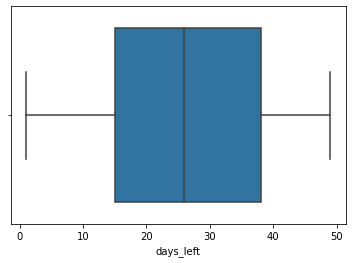

In [9]:
sns.boxplot(x='days_left',data=data)

<AxesSubplot:xlabel='price'>

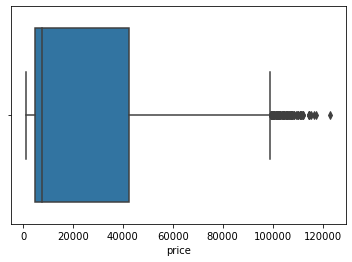

In [10]:
sns.boxplot(x='price',data=data)

###  Data visualization

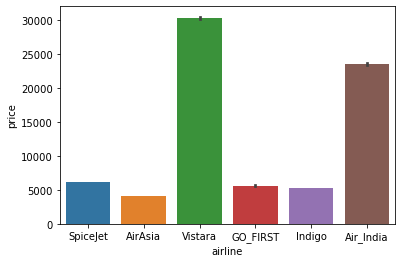

In [11]:
sns.barplot(x='airline',y= 'price', data=data)
plt.show()

    Price vary with Airlines..

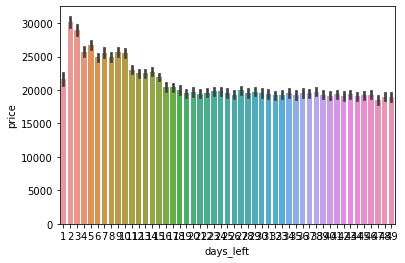

In [12]:
sns.barplot(x='days_left',y= 'price', data=data)
plt.show()

    As day's left decreases price of flight incereases..

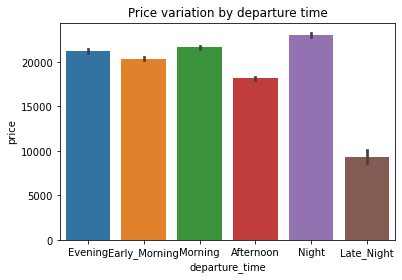

In [13]:
sns.barplot(x='departure_time',y='price',data=data)
plt.title('Price variation by departure time')
plt.show()

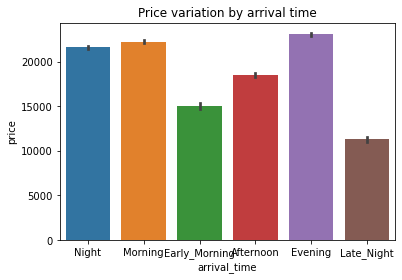

In [14]:
sns.barplot(x='arrival_time',y='price',data=data)
plt.title('Price variation by arrival time')
plt.show()

    Ticket price change based on the departure time and arrival time..

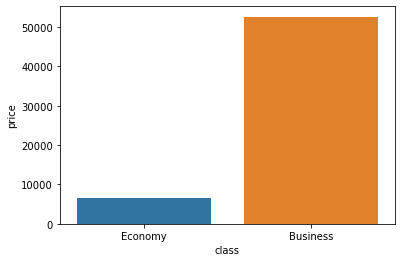

In [15]:
sns.barplot(x='class',y='price',data=data)
plt.show()

In [ ]:
plt.pie(x='stops',data=encoder)

    Ticket price vary between Economy and Business class

### Feature Engineering

In [17]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [18]:
cat_columns = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class',]
num_columns = ['duration','days_left']

In [19]:
encoder = OrdinalEncoder().fit_transform(data[cat_columns])
encoder = pd.DataFrame(encoder,columns = cat_columns)

In [20]:
encoder.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,4.0,1408.0,2.0,2.0,2.0,5.0,5.0,1.0
1,4.0,1387.0,2.0,1.0,2.0,4.0,5.0,1.0
2,0.0,1213.0,2.0,1.0,2.0,1.0,5.0,1.0
3,5.0,1559.0,2.0,4.0,2.0,0.0,5.0,1.0
4,5.0,1549.0,2.0,4.0,2.0,4.0,5.0,1.0


In [21]:
x = pd.concat([encoder,data[num_columns]],axis=1)
y = data['price']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=56)

In [24]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(210107, 10) (90046, 10) (210107,) (90046,)


In [25]:
model = LinearRegression()

In [26]:
model.fit(train_x,train_y)

LinearRegression()

In [27]:
pred = model.predict(test_x) 
pred

array([51811.81253873, 53921.56900201, 57411.89480719, ...,
       11654.435642  ,  4204.47976049,  9566.03217726])

In [28]:
model.score(train_x,train_y)

0.9048228529130661

In [29]:
# model.score(test_x,pred)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score = r2_score(test_y,pred)

##### Model Accuracy 

In [32]:
print('Accuracy of Linearn Regression Model is:',r2_score)

Accuracy of Linearn Regression Model is: 0.9041466045286557


### Conclusion

    Q.Does price vary with Airlines?
    A.Yes, Price does vary with different airlines.
    
    Q.How is the price affected when tickets are bought in just 1 or 2 days before departure?
    A.when tickets are bought in just 1 0r 2 days before departure prices woudl be higher.
    
    Q.Does ticket price change based on the departure time and arrival time?
    A.Yes, tiket prices changes on the departute time and arrival time.
    
    Q.How the price changes with change in Source and Destination?
    A.Yes, prices changes with change in Source and Destination.
    
    Q. How does the ticket price vary between Economy and Business class?
    A. The ticket price vary between Economy and Business class